In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

**Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.**

## Objetivos
* Preprocesamiento de los datos.
* Transformación y creación de Dummys y enumeraciones.
* División de los datos en Train y Test.
* Estudio de los datos utilizando herramientas anteriores (gráficas, hipótesis…).

# Ejercicio 1
Divida el conjunto de datos adjunto en train y test. Estudie los dos conjuntos por separado, a nivel descriptivo. También adjunto encontrará una descripción de las diferentes variables del dataset.

# Solución

In [35]:
df=pd.read_csv('housing data.csv', header=None,names=[ 'CRIM', 'ZN', 'INDUS',
                                                      'CHAS', 'NOX', 'RM', 'AGE',
                                                      'DIS', 'RAD', 'TAX', 'PTRATIO',
                                                      'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


|Variable|Descripción|
|--------|-----------|
|CRIM | tasa de criminalidad per cápita por ciudad|
|ZN | proporción de terreno residencial zonificado para lotes de más de 25.000 pies cuadrados|
|INDUS | proporción de acres comerciales no minoristas por ciudad|
|CHAS | variable ficticia del río Charles (1 si el tramo limita con el río; 0 en caso contrario)|
|NOX | concentración de óxidos nítricos (partes por 10 millones)|
|RM | número promedio de habitaciones por vivienda|
|AGE | proporción de unidades ocupadas por propietarios construidas antes de 1940|
|DIS | distancias ponderadas a cinco centros de empleo de Boston|
|RAD | índice de accesibilidad a las carreteras radiales|
|TAX | tasa del impuesto sobre bienes inmuebles de valor íntegro por 10.000 dólares|
|PTRATIO | ratio alumno-profesor por localidad|
|B | $1000(Bk - 0.63)^2$ donde Bk es la proporción de negros por ciudad|
|LSTAT | porcentaje de la población de menor estatus|
|MEDV | valor medio de las viviendas ocupadas por sus propietarios en miles de dólares|

### 1. Procesado

1. Verificar si existe valores nulos.

In [153]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. Observar los tipos de datos de cada columna.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


3. Mostrar descripción estadística de las variable.

In [3]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


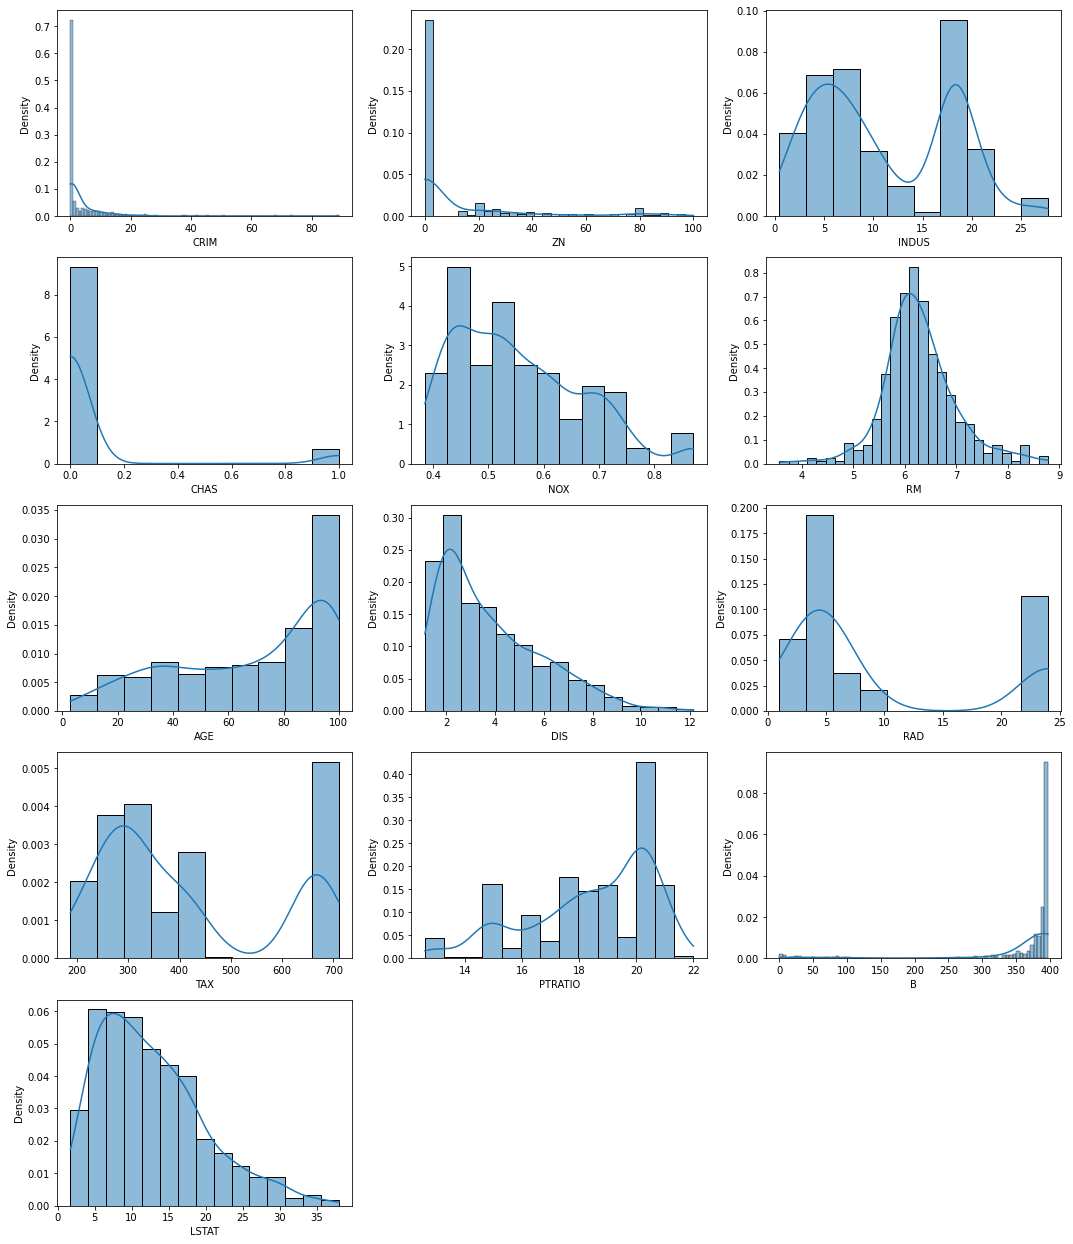

In [4]:
f=plt.figure(figsize=(18,22))
for i , col in zip(range(1,14),df.columns):
    fplot=f.add_subplot(5,3,i)
    sns.histplot(data=df, x=col, kde=True,stat='density');

Aunque todas las variables son valores numéricos, se puede ver la distribución de datos y algunas también son categóricas(**CHAS** y **RAD**).

In [36]:
# convertir la variable CHAS y RAD a categórica.
df['CHAS']=df['CHAS'].astype('int64').astype('category')
df['RAD']=df['RAD'].astype('int64').astype('category')

4. Relación entre todas y cada una de las variables.

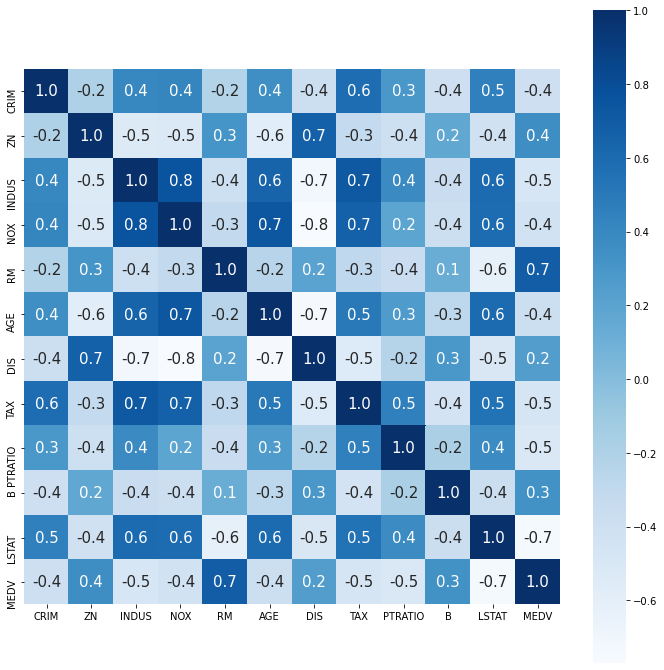

In [11]:
corr=df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':15},fmt='.1f',square=True);

Los valores van de -1 a 1, si un valor se apróxima a 1 tendrá una correlación positiva(fuerte) y si se apróxima a -1, tendra una correlación negativa(débil). Ahora, al examinar la columna MEDV, es mucho más fácil encontrar el cuadrado más oscuro RM y el más claro LSTAT. Habrá observado que, técnicamente, el cuadrado MEDV es el más oscuro. Esto tiene que ser así porque el MEDV está perfectamente correlacionado consigo mismo. Lo mismo ocurre con cada columna a lo largo de la diagonal.

Se observa una alta correlación de la columna **MEDV** con **RM**(negativa) y **LSTAT**(positiva).

4. La variable objetivo será la columna, **MEDV**. Por lo tanto, la extraemos de la siguiente manera:

In [6]:
y=df['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

5. Eliminamos la columna **MEDV** de nuestro DataSet.

In [7]:
X=df.drop('MEDV', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [56]:
# Imprimir la forma de ambos conjuntos de datos:
print('X:',X.shape,'\nY:',y.shape)

X: (506, 13) 
Y: (506,)


### 2. División train/test
Ahora, dividimos los datos aleatoriamente en conjuntos de **train**/**test** con divisiones de 0.7/0.3 respectivamente. Utilizamos el método **sklearn train_test_split()**. Este método puede tomar múltiples entradas y devolver múltiples salidas. Al pasar **X** e **y**, **X** se convierte en **XTrain** y **Xtest** , e **y** se convierte en **ytrain** y **ytest**. La variable **train_size** es la fracción de los datos originales que se incluirá en el conjunto de entrenamiento, y la **test_size** es la fracción que se incluirá en la otra división. Se pueden especificar por separado, por lo que se especifica **train** como 0.7, y **test** como 0.3.

![train_test](train_test.png)


In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,train_size=0.7,test_size=0.3, random_state=123)

Al imprimir la forma de las cuatro matrices, según el fragmento de código anterior, es posible confirmar que el tamaño del subconjunto de prueba (tanto $X$ como $y$ ) es el 30\% del tamaño total del conjunto de datos original (506 $\times$ 0.3 = 151.8) redondeado a un número entero, mientras que el tamaño del conjunto de entrenamiento es el 80\% restante:

In [9]:
print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

(354, 13) (354,) (152, 13) (152,)


In [10]:
ytrain

273    35.2
52     25.0
181    36.2
452    16.1
381    10.9
       ... 
98     43.8
476    16.7
322    20.4
382    11.3
365    27.5
Name: MEDV, Length: 354, dtype: float64

In [11]:
ytest

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
       ... 
310    16.1
91     22.0
151    19.6
426    10.2
472    23.2
Name: MEDV, Length: 152, dtype: float64

# Ejercicio 2
Aplique algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

# Solución

### Normalización

El concepto de normalización trata del proceso de ajustar los valores medidos en diferentes escalas a escalas comunes antes de realizar estadísticas descriptivas, y se denota mediante la siguiente ecuación: 

$$
x_{nor}=\frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalización estándar

La normalización estándar es similar a la normalización excepto que tiene una media de 0 y una desviación estándar de 1. La normalización estándar se denota mediante la siguiente ecuación: 

$$
x_{st}=\frac{x-\mu}{\sigma}
$$

Por Ejemplo, para  crear dos nuevas columna una normalizada y otra estandarizada de la columna **TAX**, podemos utilizar el siguiente código: 

```python
df['TAX_NOR']=(df.TAX-df.TAX.min())/(df.TAX.max()-df.TAX.min())
df.head()
```

```python
df['TAX_SN']=(df.TAX-df.TAX.mean())/(df.TAX.std())
df.head()
```

Sin embargo, haremos uso de la libreria **sklearm** de python para obtener estas nuevas columnas de la siguiente manera:

#### Crear columna normalizada

In [37]:
normalize=MinMaxScaler()
df['AGE_NOR']=normalize.fit_transform(df[['AGE']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_NOR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.641607
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.782698
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.599382
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.441813
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.528321


#### Crear columna estandarizada

In [38]:
standard = StandardScaler()
df['RM_ST']=standard.fit_transform(df[['RM']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_NOR,RM_ST
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.641607,0.413672
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.782698,0.194274
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.599382,1.282714
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.441813,1.016303
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.528321,1.228577


#### Términos de interacción y características polinómicas


Scikit-learn proporciona la clase **PolynomialFeatures** en el módulo de preprocesamiento para crear fácilmente términos de interacción y características polinómicas. Esto resulta útil cuando se construyen modelos con características categóricas y continuas. Especificando sólo el grado, podemos obtener todas las combinaciones de características menores o iguales al grado. Los grados altos aumentan mucho la complejidad del modelo y pueden llevar a un sobreajuste.

Si utilizamos grado=2 , podemos convertir una columna llamada **Col_name** de la siguiente manera:

$$
1 + Col\_name + Col\_name^{2},
$$

donde 1 es el término de sesgo(bias) que puede utilizarse en un modelo como término de intercepción.

Acontinuación vamos a obtener nuevas columnas a partir de la columna **LSTAT**.

Instancear modelo

```python
poly2=PolynomialFeatures(degree=2)
```
Al ser un polinónio de grado 2, nos creará un array de 3 columnas que son:
  *  las bias
  * la columna LSTAT 
  * la columna LSTAT$^2$.

Por lo tanto, creamos 3 nuevas columnas y dado que **LSTAT** ya existe, esta se sobreescribirá

```python  
df[['bias','LSTAT','LSTAT^2']]=poly2.fit_transform(df[['LSTAT']])
df.head()
```

In [39]:
poly2=PolynomialFeatures(degree=2)
df[['bias','LSTAT','LSTAT^2']]=poly2.fit_transform(df[['LSTAT']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,AGE_NOR,RM_ST,bias,LSTAT^2
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,0.641607,0.413672,1.0,24.8004
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,0.782698,0.194274,1.0,83.5396
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,0.599382,1.282714,1.0,16.2409
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,0.441813,1.016303,1.0,8.6436
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,0.528321,1.228577,1.0,28.4089


## Ejercicio 3
Resuma las nuevas columnas generadas de manera estadística y gráfica

# Solución

1. Los datos de la columna **AGE_NORM**, oscilan entre 0 y 1, esto es fácil de ver en la fórmula del **Ejercicio 2** , dado que, si $x=x_{min}$ , entonces $x_{nor}=0$. Por otro lado, si $x=x_{max}$ , entonces $x_{nor}=1$.

In [170]:
df.AGE_NOR.describe()

count    506.000000
mean       0.676364
std        0.289896
min        0.000000
25%        0.433831
50%        0.768280
75%        0.938980
max        1.000000
Name: AGE_NOR, dtype: float64

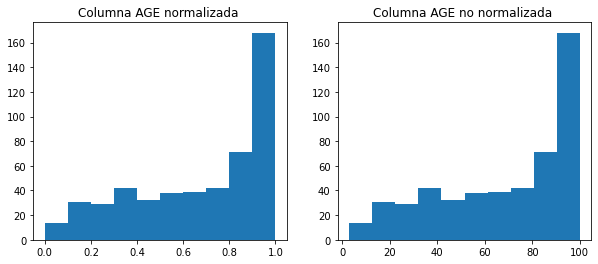

In [15]:
fig=plt.figure(figsize=(10,4))
ax1=fig.add_subplot(1,2,1)
ax1.hist(df['AGE_NOR'])
plt.title('Columna AGE normalizada ')

ax2=fig.add_subplot(1,2,2)
ax2.hist(df['AGE'])
plt.title('Columna AGE no normalizada ');

2. Los datos de la columna **RM_ST**, tiene como $\mu = 0$ y $\sigma = 1$. La estandarización supone que las observaciones se ajustan a una distribución gaussiana (curva de campana) con una media y una desviación estándar de buen comportamiento.

In [172]:
df.RM_ST.describe().round(4)

count    506.0000
mean      -0.0000
std        1.0010
min       -3.8802
25%       -0.5686
50%       -0.1085
75%        0.4828
max        3.5550
Name: RM_ST, dtype: float64

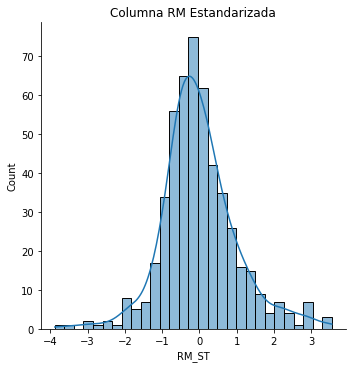

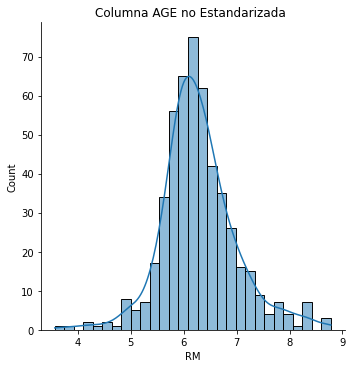

In [173]:
sns.displot(df['RM_ST'],kde=True)
plt.title('Columna RM Estandarizada')

sns.displot(df['RM'],kde=True)
plt.title('Columna AGE no Estandarizada ');

